# Problem Overview 

Banking Organization deals in all loans. They have presence across all types of Loans. Customer first apply for loan after that bank validates the customer eligibility for loan. Bank wants to automate the loan eligibility process based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

##  Importing Libraries for Data Analysis

The models are implemented using Python 3.9.0 with listed libraries:

### Pandas 

* Pandas is a Python package to work with structured and time series data.The data from various file formats such as csv, json, sql etc can be imported using Pandas.
It is a powerful open source tool used for data analysis and data manipulation operations such as data cleaning, merging,   selecting as well wrangling.

### Seaborn 

* Seaborn is a python library for building graphs to visualise data. It provides integration with pandas. This open source tool helps in defining the data by mapping the data on the informative and interactive plots. Each element of the plots gives meaningful information about the data.

### Sklearn 

* This python library is helpful for building machine learning and statistical models such as clustering, classification, regression etc. Though it can be used for reading, manipulating and summarizing the data as well, better libraries are there to perform these functions.

### Matplotlib

* Matplotlib is a very popular Python library for data visualization. Like Pandas, it is not directly related to Machine Learning. It particularly comes in handy when a programmer wants to visualize the patterns in the data. It is a 2D plotting library used for creating 2D graphs and plots. A module named pyplot makes it easy for programmers for plotting as it provides features to control line styles, font properties, formatting axes, etc. It provides various kinds of graphs and plots for data visualization, viz., histogram, error charts, bar chats, etc,

In [1]:
#Loading Packages
import pandas as pd                 
import numpy as np  #for mathematical calculation
import seaborn as sns   #for data visualization
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the Dataset to pandas DataFrame
load_dataframe=pd.read_csv("D:/ML_Project/loan.csv")
load_dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Understanding the Dataset 

* The machine learning model is trained using the training data set. Every new applicant details filled at the time of application form acts as a test data set. On the basis of the training data sets, the model will predict whether a loan would be approved or not. We have 13 features in total out of which we have 12 independent variables and 1 dependent variable i.e. Loan_Status in train dataset and 12 independent variables in test dataset. The Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are all categorical

In [3]:
#Returns tuple of shape (Rows, columns) of dataframe/series
load_dataframe.shape

(614, 13)

In [4]:
#Returns size of dataframe/series which is equivalent to total number of elements. That is rows x columns.
load_dataframe.size

7982

In [5]:
#Returns the top 6 rows data from the entire dataset
load_dataframe.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
#The index of returned rows is ranging from 608 to 613. Hence, last 6 rows were returned.
load_dataframe.tail(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#### Show histograms for all numeric values¶
   Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset. The following are some of the characteristics of histograms −

* It provides us a count of the number of observations in each bin created for visualization.

* From the shape of the bin, we can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.

* Histograms also help us to see possible outliers.

* Use the DataFrame.hist method of Pandas. You can set the figsize parameter to adjust size

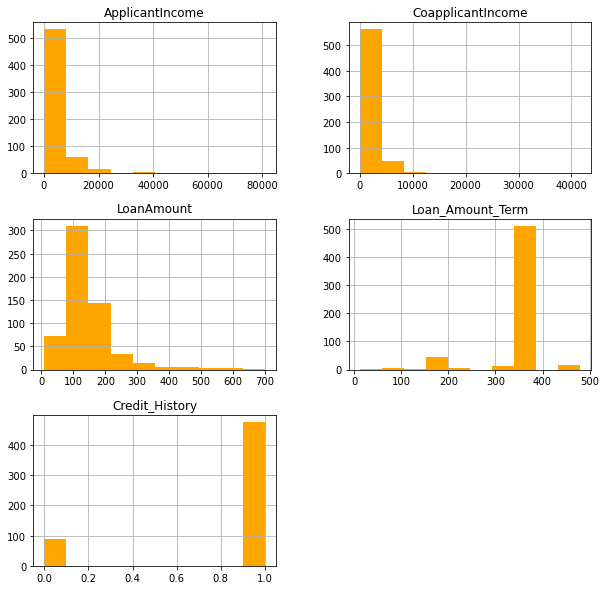

In [7]:
pd.DataFrame.hist(load_dataframe
                  , figsize = [10,10],color='orange'
                 );

#### Show column names
Use the columns attribute of pandas on df

In [8]:
# Features in the dataset
load_dataframe.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#Returns attribute to find out the data type (dtype) of each column in the given dataframe.
load_dataframe.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Exploratory Data Analysis 

* Exploratory Data Analysis (EDA) is best described as an approach to find patterns, spot anomalies or differences, and other features that best summarise the main characteristics of a data set.

## Univariate Visual Analysis

* Univariate data visualization plots help us to enumerative properties as well as a descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution

### Target Variable - Loan Status 

We will start first with an independent variable which is our target variable as well. We will analyse this categorical variable using a bar chart as shown below. The bar chart shows that loan of 422 ( around 69 % ) people out of 614 was approved

In [10]:
display(load_dataframe['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64

### Normalization 

* Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

In [11]:
load_dataframe['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

The bar chart shows that loan of 422 ( around 69 % ) people out of 614 was approved

<AxesSubplot:title={'center':'Loan_status'}>

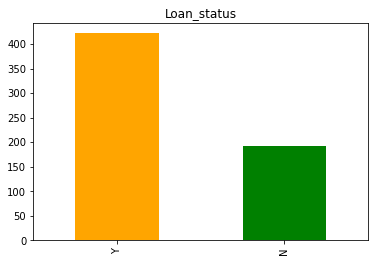

In [12]:
load_dataframe['Loan_Status'].value_counts(normalize=True)
load_dataframe['Loan_Status'].value_counts().plot.bar(title= 'Loan_status',color=['orange','green'])

#  Independant Features

Below are the types of features available in this datasets:

**1. Categorical features(Nominal):** These variables are categorical without order or ranking. Below are the list of such variables in this data:

* Gender
* Marrital Status
* Employment Type
* Credit_History

It can be inferred from the below bar plots that in our observed data:

In [13]:
############ Count number of Categorical ######################
load_dataframe = load_dataframe.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Self_Employed','Credit_History']
#categorical_columns = ['Gender', 'Married', Self_Employed', 'Credit_History']
print(categorical_columns)


['Gender', 'Married', 'Self_Employed', 'Credit_History']


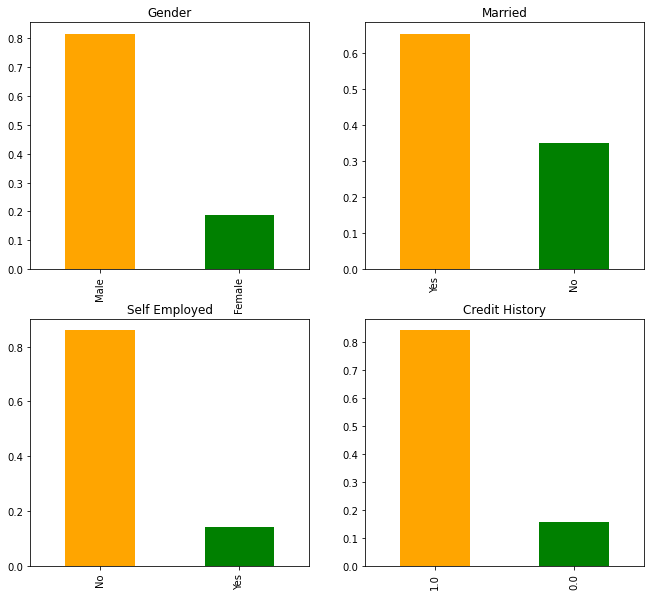

In [14]:
# Visualizing categorical features
plt.figure(1)
plt.subplot(221)
load_dataframe['Gender'].value_counts(normalize=True).plot.bar(figsize=(11,10), title= 'Gender',color=['orange','green'])

plt.subplot(222)
load_dataframe['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color=['orange','green'])

plt.subplot(223)
load_dataframe['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed',color=['orange','green'])

plt.subplot(224)
load_dataframe['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit History',color=['orange','green'])


plt.show()

* 80% of loan applicants are male in the training dataset.
* Nearly 70% are married
* Around 15% of applicants are self employed
* Nearly 85–90% loan applicants are not self-employed
* Nearly 85% of the people are having the credit history.

**2. Categorical features(Ordinal):** These variables in categorical in nature having some order involved.

* Number Of Dependents
* Education Level
* Property or Area Background

In [15]:
############ Count number of ordinal features ######################
ordinal_columns = ['Dependents', 'Education', 'Property_Area']
#ordinal_columns = ['Dependents', 'Education', 'Property_Area']
print(ordinal_columns)


['Dependents', 'Education', 'Property_Area']


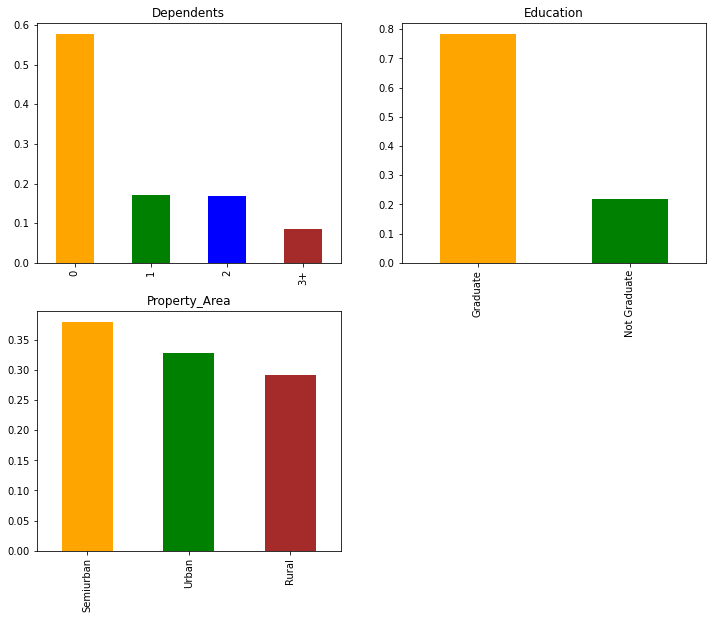

In [16]:
# Visualizing Ordinal features
plt.figure()
plt.subplot(321)
load_dataframe['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,15), title= 'Dependents',color=['orange','green','blue','brown'])

plt.subplot(322)
load_dataframe['Education'].value_counts(normalize=True).plot.bar(title= 'Education',color=['orange','green'])

plt.subplot(323)
load_dataframe['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area',color=['orange','green','brown'])

plt.show()

* Almost 58% of the applicants have no dependents.

* About 75% of loan applicants are graduates

* most of the applicant reside in Semiurban area

**3. Numerical features(Ratio):** These features have numerical values.

* Applicant's Income
* Coapplicant Income
* Loan_Amount
* Loan_Amount_Term

## Ordinal Features

In [17]:
############ Count number of Numerical Columns #####################
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term' ]
#numerical_columns = [ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term']
print(numerical_columns)


['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term']


**ApplicantIncome**

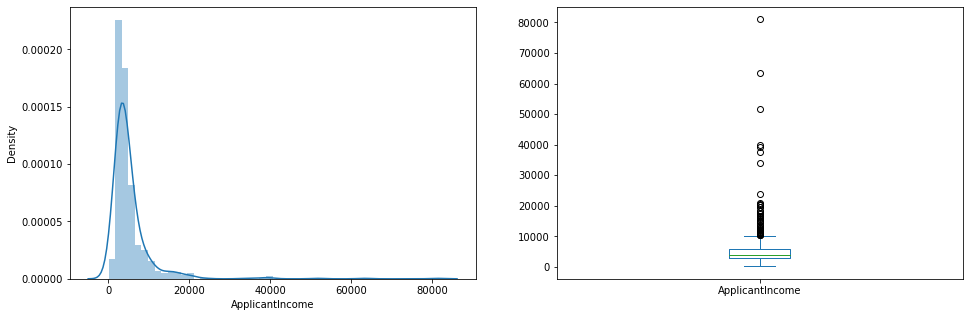

In [18]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(load_dataframe['ApplicantIncome']);

plt.subplot(122)
load_dataframe['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

* It can be inferred that most of the data in Applicant income is towards left which means it is not normally distributed. The boxplot confirms the presence of outliers. This can be attributed to income disparity in the society.

**CoapplicantIncome**

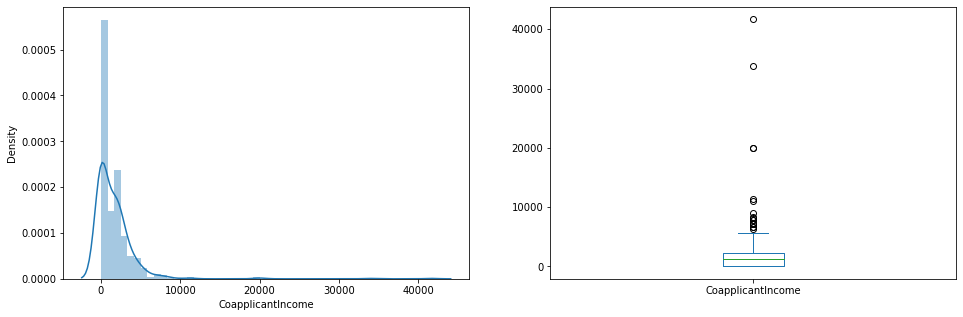

In [19]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(load_dataframe['CoapplicantIncome']);

plt.subplot(122)
load_dataframe['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

* CoapplicantIncome is lesser than applicantIncome and is within the 5000–15000, again with some outliers.

# Bivariate Analysis

Bivariate analysis is finding some kind of empirical relationship between two variables. Specifically the dependent vs independent Variables

### Categorical Independent Vs Target

#### Gender Vs Loan_Status 

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


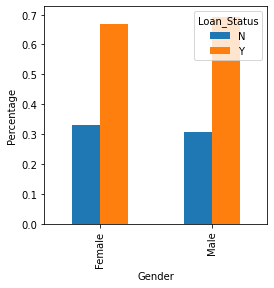

In [20]:
print(pd.crosstab(load_dataframe['Gender'],load_dataframe['Loan_Status']))

Gender=pd.crosstab(load_dataframe['Gender'],load_dataframe['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

* There is not a substantial difference between male and female approval rates.

#### Marriage Status Vs Loan_Status

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


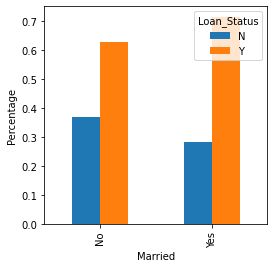

In [21]:
print(pd.crosstab(load_dataframe['Married'],load_dataframe['Loan_Status']))

Married=pd.crosstab(load_dataframe['Married'],load_dataframe['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

* Married applicants have a slightly higher chances of loan approval.

#### Dependency Vs Loan_Status 

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


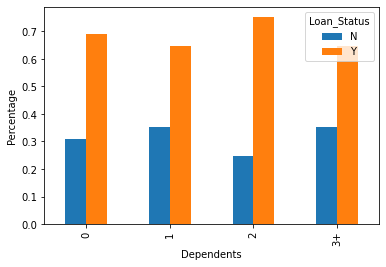

In [22]:
print(pd.crosstab(load_dataframe['Dependents'],load_dataframe['Loan_Status']))

Dependents=pd.crosstab(load_dataframe['Dependents'],load_dataframe['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

* Applicants with no dependents or 2 dependents have higher chances of approval. But this does not correlate well.

#### Education Vs Loan_Status 

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


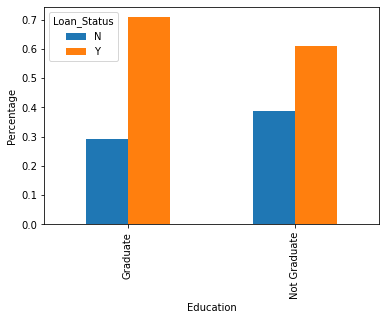

In [23]:
print(pd.crosstab(load_dataframe['Education'],load_dataframe['Loan_Status']))

Dependents=pd.crosstab(load_dataframe['Education'],load_dataframe['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Education')
p = plt.ylabel('Percentage')

* Graduates have higher chance of loan approval compared to non-graduates.

**Self_Employed Vs Loan_Status** 

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


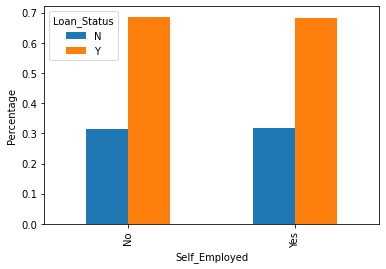

In [24]:
print(pd.crosstab(load_dataframe['Self_Employed'],load_dataframe['Loan_Status']))

Dependents=pd.crosstab(load_dataframe['Self_Employed'],load_dataframe['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

* Self_Employed employees have slightly lower chances of loan approval but the situation is not that bad.



**Credit_History Vs Loan_Status** 

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


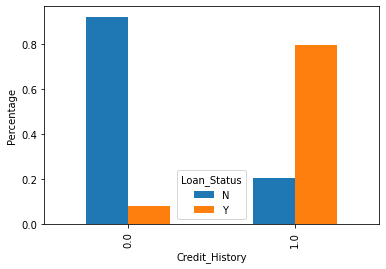

In [25]:
print(pd.crosstab(load_dataframe['Credit_History'],load_dataframe['Loan_Status']))

Dependents=pd.crosstab(load_dataframe['Credit_History'],load_dataframe['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

* It seems people with credit history as 1 are more likely to get their loans approved



**Property_Area Vs Loan_Status** 

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


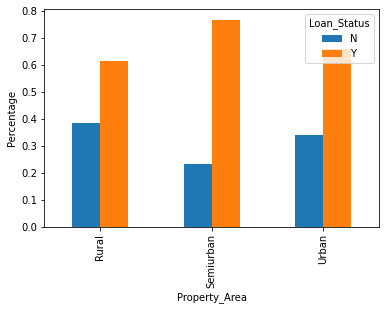

In [26]:
print(pd.crosstab(load_dataframe['Property_Area'],load_dataframe['Loan_Status']))

Dependents=pd.crosstab(load_dataframe['Property_Area'],load_dataframe['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
p = plt.ylabel('Percentage')

* Propotion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Missing Value Imputation¶

The following list shows the total amount of missing or corrupt data in our data. To fix this, we replace missing categorical variables with it's mode and missing numerical variables with it's mean

In [27]:
# Checking the missing values
load_dataframe.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

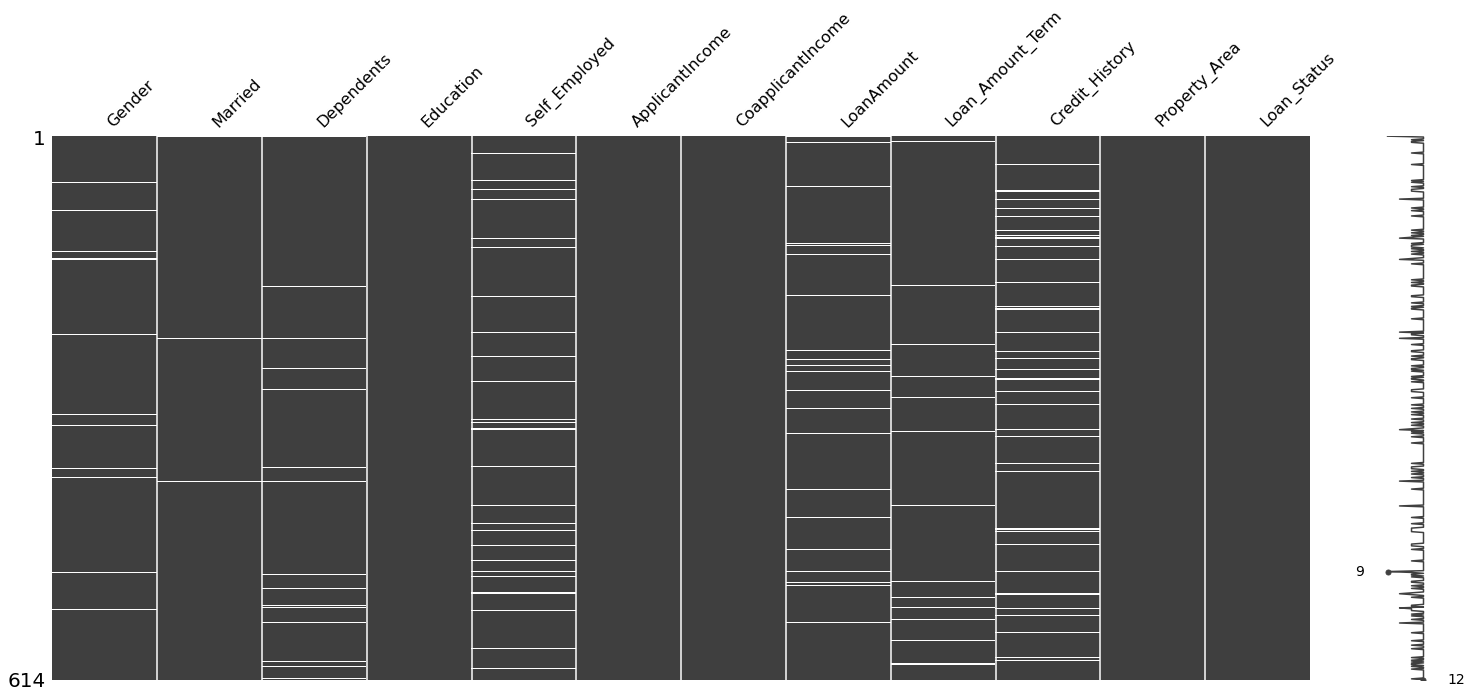

In [28]:
import missingno as msno
%matplotlib inline
msno.matrix(load_dataframe.sample(614))
plt.show()

In [29]:
# replacing the missing values with the mode
load_dataframe['Gender'].fillna(load_dataframe['Gender'].mode()[0], inplace=True)
load_dataframe['Married'].fillna(load_dataframe['Married'].mode()[0], inplace=True)
load_dataframe['Dependents'].fillna(load_dataframe['Dependents'].mode()[0], inplace=True)
load_dataframe['Self_Employed'].fillna(load_dataframe['Self_Employed'].mode()[0], inplace=True)
load_dataframe['Credit_History'].fillna(load_dataframe['Credit_History'].mode()[0], inplace=True)

In [30]:
load_dataframe['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
load_dataframe['Loan_Amount_Term'].fillna(load_dataframe['Loan_Amount_Term'].mode()[0], inplace=True)

In [32]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = load_dataframe.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education',aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
load_dataframe['LoanAmount'].fillna(load_dataframe[load_dataframe['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [33]:
load_dataframe.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

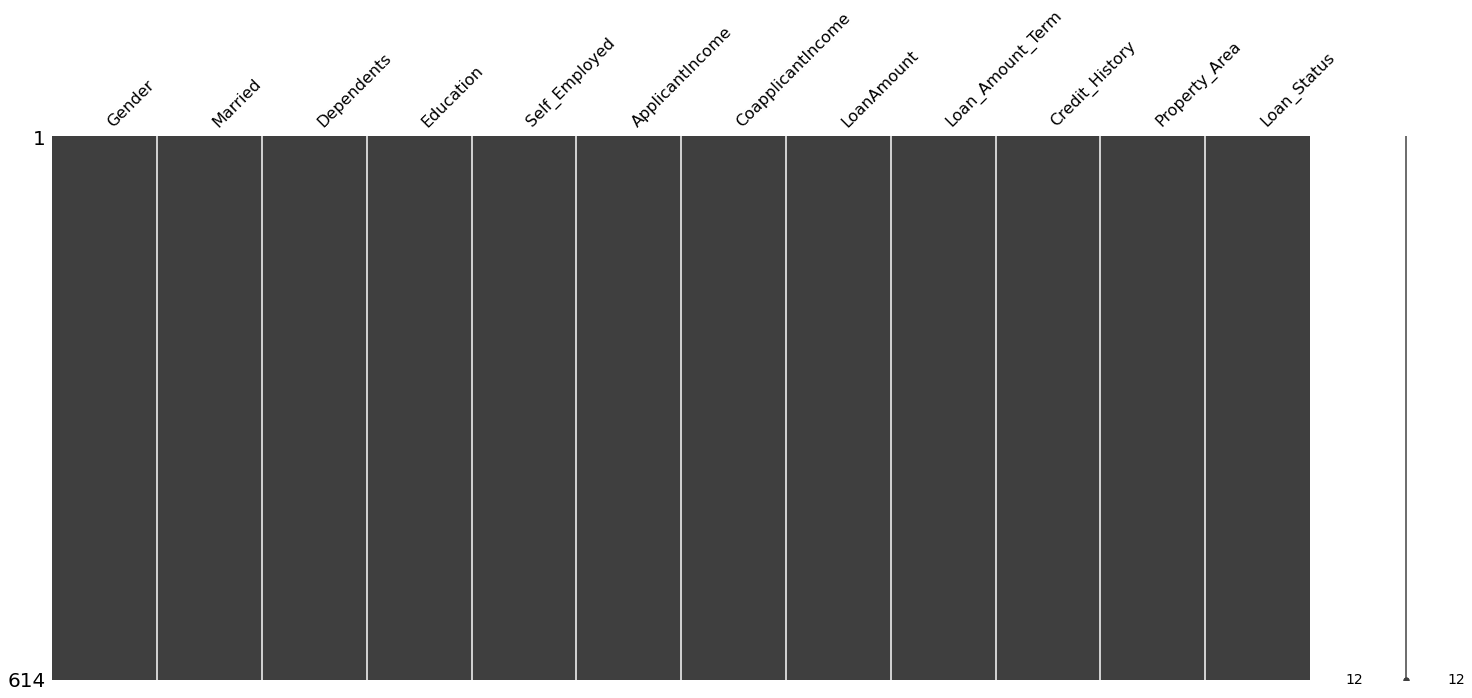

In [34]:
import missingno as msno
%matplotlib inline
msno.matrix(load_dataframe.sample(614))
plt.show()

In [36]:
matrix= load_dataframe.corr() 
print(load_dataframe.head())
Catos = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for cato in Catos:
    load_dataframe[cato] = load_dataframe[cato].astype('category').cat.codes


  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       130.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3 

# Visualizing correlation via Heatmap

The variables with darker color means their correlation is more



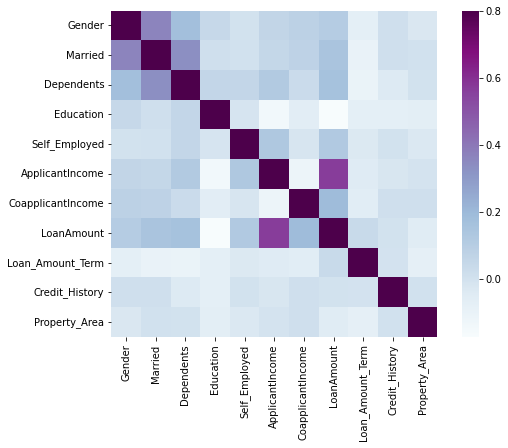

In [37]:
matrix = load_dataframe.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount). LoanAmount is also correlated with CoapplicantIncome

# Correlation between Quantitative Variables

In [38]:
np.corrcoef(load_dataframe['LoanAmount'], load_dataframe['ApplicantIncome'])

array([[1.        , 0.56594043],
       [0.56594043, 1.        ]])

##### correlation between loan amount and applicant income is 56%

In [39]:
np.corrcoef(load_dataframe['LoanAmount'], load_dataframe['CoapplicantIncome'])

array([[1.        , 0.18812781],
       [0.18812781, 1.        ]])

##### correlation between loan amount and coapplicant income is 19 %

# Outlier Treatment

Due to outliers in the Loan Amount. the data in the loan amount is skewed towards the right, which means bulk of the data is towards the left. We remove this skewness by doing a log transformation. A log transformation doesn't effect affect the smaller values much but reduces the larger values. So the distribution becomes normal

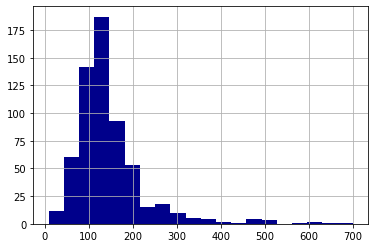

In [40]:
# Looking at the distribtion of Loan amount
load_dataframe['LoanAmount'].hist(bins=20,color=['darkblue'])

plt.show()

- The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

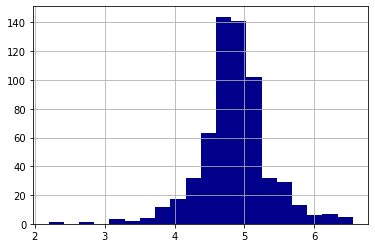

In [41]:
y=load_dataframe.Loan_Status
load_dataframe_V1=load_dataframe.drop('Loan_Status',axis=1)
load_dataframe['LoanAmount_log']=np.log(load_dataframe['LoanAmount'])
load_dataframe['LoanAmount_log'].hist(bins=20,color=['darkblue'])

plt.show()

In [42]:
"""Sklearn requires the target variable in a separate dataset.
so, we will drop our target variable from the train dataset and save it in another dataset."""

x = load_dataframe.drop('Loan_Status',axis=1)
y = load_dataframe.Loan_Status                 # Save target variable in separate dataset

In [43]:
#As logistic regression takes only the numerical values as input, we have to change every categorical variable to continious 
x=pd.get_dummies(x)
load_dataframe=pd.get_dummies(load_dataframe)

In [44]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building

# Logistic Regression

This is a classification algorithm which uses a logistic function to predict binary outcome (True/False, 0/1, Yes/No) given an independent variable. The aim of this model is to find a relationship between features and probability of particular outcome. The logistic function used is a logit function which is a log of odds in the favor of the event. Logit function develops a s-shaped curve with the probability estimate similar to a step function.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
LR=LogisticRegression(solver='lbfgs', max_iter=1000,n_jobs=5,random_state=1)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000, n_jobs=5, random_state=1)

In [46]:
y_pred = LR.predict(x_test)
print("\nAccuracy Score: %f"%(accuracy_score(y_test,y_pred)*100))
print("Precision Score: %f"%(precision_score(y_test,y_pred,pos_label='Y')*100))
print("Recall Score: %f"%(recall_score(y_test,y_pred,pos_label='Y')*100))
print(confusion_matrix(y_test,y_pred))


Accuracy Score: 79.674797
Precision Score: 78.095238
Recall Score: 97.619048
[[16 23]
 [ 2 82]]


In [47]:
print('Classification Report', '\n',classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           N       0.89      0.41      0.56        39
           Y       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



**Accuracy**
* Accuracy is a machine learning model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations
* Mathematically, it represents the ratio of the sum of true positive and true negatives out of all the predictions.

**Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)**

**Precision**
* Model precision score represents the model’s ability to correctly predict the positives out of all the positive                predictions it   made. 
* The precision score is a useful measure of the success of prediction when the classes are very imbalanced.
* Mathematically, it represents the ratio of true positive to the sum of true positive and false positive.

**Precision Score = TP / (FP + TP)**

**Recall**
*   Recall score represents the model’s ability to correctly predict the positives out of actual positives.
*   This is unlike precision which measures how many predictions made by models are actually positive out of all positive           predictions made
*   Mathematically, it represents the ratio of true positive to the sum of true positive and false negative.

**Recall Score = TP / (FN + TP)**

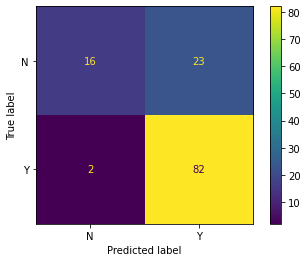

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR,x_test,y_test)
plt.show()

# Decision Tree Classiier

This is a supervised machine learning algorithm mostly used for classification problems. All features should be discretized in this model, so that the population can be split into two or more homogeneous sets or subsets. This model uses a different algorithm to split a node into two or more sub-nodes. With the creation of more sub-nodes, homogeneity and purity of the nodes increases with respect to the dependent variable.

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [74]:
max_depth=dtc_clf.tree_.max_depth
print(max_depth)

21


In [75]:
from sklearn import tree
parameter=range(1,max_depth+1)
from sklearn.model_selection import cross_val_score
average_scores=[]
for par in parameter:
    dtc_clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=par, random_state =2)
    scores=cross_val_score(dtc_clf,x_train,y_train,scoring='accuracy',cv=5)
    average_scores.append(np.mean(scores))
print(average_scores)

[0.8106575963718822, 0.8045145330859617, 0.8004329004329005, 0.802473716759431, 0.7963512677798392, 0.7943310657596372, 0.7882086167800455, 0.7801071943929088, 0.7475159760874046, 0.7475365903937332, 0.725211296639868, 0.7190682333539475, 0.7109461966604824, 0.7027623170480314, 0.7048237476808905, 0.6884972170686456, 0.6987012987012988, 0.6925788497217068, 0.6823747680890538, 0.6905380333951763, 0.6925788497217068]


In [76]:
top_par_cv=parameter[np.argmax(average_scores)]
print(f"max_depth:{top_par_cv}")

max_depth:1


In [77]:
dtc_tunned = DecisionTreeClassifier(criterion="entropy", max_depth = top_par_cv, random_state = 2)

In [78]:
dtc_tunned.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=2)

In [79]:
y_pred = dtc_tunned.predict(x_test)
print("\nAccuracy Score: %f"%(accuracy_score(y_test,y_pred)*100))
print("Precision Score: %f"%(precision_score(y_test,y_pred,pos_label='Y')*100))
print("Recall Score: %f"%(recall_score(y_test,y_pred,pos_label='Y')*100))
print(confusion_matrix(y_test,y_pred))


Accuracy Score: 80.487805
Precision Score: 78.301887
Recall Score: 98.809524
[[16 23]
 [ 1 83]]


In [80]:
print('Classification Report', '\n',classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           N       0.94      0.41      0.57        39
           Y       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



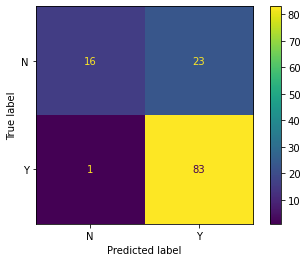

In [81]:
plot_confusion_matrix(dtc_tunned,x_test,y_test)
plt.show()

# Random Forest Classifier

This is a tree based ensemble model which helps in improving the accuracy of the model . It combines a large number of Decision trees to build a powerful predicting model. It takes a random sample of rows and features of each individual tree to prepare a decision tree model. Final prediction class is either the mode of all the predictors or the mean of all the predictors.

In [82]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rmf_clf=RandomForestClassifier(max_depth=5,n_estimators = 10,random_state=1)
rmf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=1)

In [83]:
y_pred=rmf_clf.predict(x_test)
print("\nAccuracy Score: %f"%(accuracy_score(y_test,y_pred)*100))
print("Precision Score: %f"%(precision_score(y_test,y_pred,pos_label='Y')*100))
print("Recall Score: %f"%(recall_score(y_test,y_pred,pos_label='Y')*100))
print(confusion_matrix(y_test,y_pred))


Accuracy Score: 78.861789
Precision Score: 77.358491
Recall Score: 97.619048
[[15 24]
 [ 2 82]]


In [84]:
print('Classification Report', '\n',classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           N       0.88      0.38      0.54        39
           Y       0.77      0.98      0.86        84

    accuracy                           0.79       123
   macro avg       0.83      0.68      0.70       123
weighted avg       0.81      0.79      0.76       123



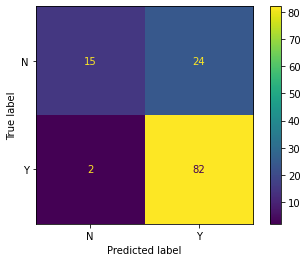

In [85]:
plot_confusion_matrix(rmf_clf,x_test,y_test)
plt.show()

# XGboost classifier

This algorithm only works with the quantitative variable. It is a gradient boosting algorithm which forms strong rules for the model by boosting weak learners to a strong learner. It is a fast and efficient algorithm which recently dominated machine learning because of its high performance and speed.

In [86]:
#XGboost classifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
XG= XGBClassifier(max_depth=10,learning_rate=0.02,random_state=10,min_child_weight=1,gamma=0,scale_pos_weight=1,eval_metric='mlogloss')
XG.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
y_pred=XG.predict(x_test)
print("\nAccuracy Score: %f"%(accuracy_score(y_test,y_pred)*100))
print("Precision Score: %f"%(precision_score(y_test,y_pred,pos_label='Y')*100))
print("Recall Score: %f"%(recall_score(y_test,y_pred,pos_label='Y')*100))
print(confusion_matrix(y_test,y_pred))


Accuracy Score: 77.235772
Precision Score: 79.787234
Recall Score: 89.285714
[[20 19]
 [ 9 75]]


In [88]:
print('Classification Report', '\n',classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           N       0.69      0.51      0.59        39
           Y       0.80      0.89      0.84        84

    accuracy                           0.77       123
   macro avg       0.74      0.70      0.72       123
weighted avg       0.76      0.77      0.76       123



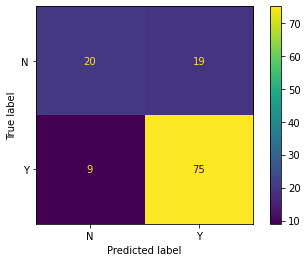

In [89]:
plot_confusion_matrix(XG,x_test,y_test)
plt.show()

In [90]:
models = []
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000,n_jobs=5,random_state=1)))
models.append(('DT', DecisionTreeClassifier(criterion="entropy", max_depth = top_par_cv, random_state = 2)))
models.append(('RF', RandomForestClassifier(max_depth=5,n_estimators = 10,random_state=1)))
models.append(('XGBoost', XGBClassifier(max_depth=10,learning_rate=0.02,random_state=10,min_child_weight=1,gamma=0,scale_pos_weight=1,eval_metric='mlogloss')))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

      Name     Score
0       LR  0.796748
1       DT  0.804878
2       RF  0.788618
3  XGBoost  0.772358


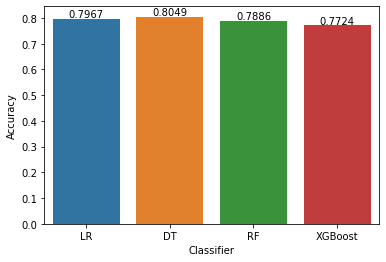

In [91]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [92]:
models = []
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000,n_jobs=5,random_state=1)))
models.append(('DT', DecisionTreeClassifier(criterion="entropy", max_depth = top_par_cv, random_state = 2)))
models.append(('RF', RandomForestClassifier(max_depth=5,n_estimators = 10,random_state=1)))
models.append(('XGBoost', XGBClassifier(max_depth=10,learning_rate=0.02,random_state=10,min_child_weight=1,gamma=0,scale_pos_weight=1,eval_metric='mlogloss')))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(precision_score(y_test, y_pred,pos_label='Y'))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

      Name     Score
0       LR  0.780952
1       DT  0.783019
2       RF  0.773585
3  XGBoost  0.797872


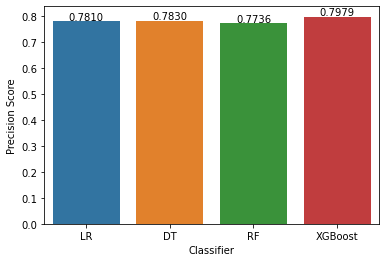

In [93]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Precision Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [94]:
models = []
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000,n_jobs=5,random_state=1)))
models.append(('DT', DecisionTreeClassifier(criterion="entropy", max_depth = top_par_cv, random_state = 2)))
models.append(('RF', RandomForestClassifier(max_depth=5,n_estimators = 10,random_state=1)))
models.append(('XGBoost', XGBClassifier(max_depth=10,learning_rate=0.02,random_state=10,min_child_weight=1,gamma=0,scale_pos_weight=1,eval_metric='mlogloss')))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(recall_score(y_test, y_pred,pos_label='Y'))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

      Name     Score
0       LR  0.976190
1       DT  0.988095
2       RF  0.976190
3  XGBoost  0.892857


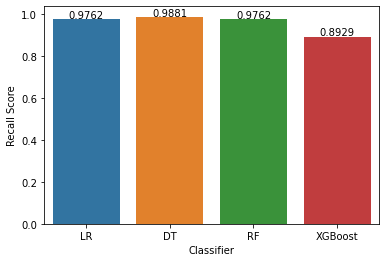

In [95]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Recall Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [97]:
y_pred = dtc_tunned.predict(x_test)

In [102]:
y_pred = dtc_tunned.predict(x_test)
load_dataframe=pd.DataFrame(y_pred)#converting the output to pandas dataframe

In [112]:
load_dataframe.head()

,0
0,Y
1,Y
2,Y
3,Y
4,Y


In [104]:
y_pred = LR.predict(x_test)

In [105]:
y_pred = LR.predict(x_test)
df=pd.DataFrame(y_pred)#converting the output to pandas dataframe

In [107]:
df.tail()

,0
118,Y
119,Y
120,Y
121,N
122,Y


# Conclusion

* To Exploratory data Analysis on the features of this dataset and saw how each feature is distributed.
* From the bivariate and multivariate analysis to see imapct of one another on their features using charts.
* To analysed each variable to check if data is cleaned and normally distributed.
* To cleaned the data and removed Null values.
* For calculated correaltion between independent variables and found that applicant income and loan amount have significant       relation.
* Finally, a model with coapplicant income and credit history as independent variable with highest accuracy.
* The tested data and got the accuracy of 80%, 79.67 %
* Out of all the classification algorithms used on the dataset, the Decision Tree and Logistic Regression algorithm gives the best overall prediction accuracy.
* Credit History, Balance Income, Property Area were the most important factors for predicting the class of the loan applicant.
* We can optimize the hyperparameters of our model and improve the accuracy.
